In [1]:
from os import path

from defi_econ.constants import UNISWAP_V3_DATA_PATH
from defi_econ.constants import UNISWAP_V2_DATA_PATH

In [2]:
import datetime
import calendar
import pandas as pd


In [3]:
data_file_v3 = path.join(UNISWAP_V3_DATA_PATH, "swap/uniswap_v3_swaps_2022TEST.csv")
data_file_v2 = path.join(UNISWAP_V2_DATA_PATH, "swap/uniswap_v2_swaps_2022TEST.csv")

pool_file_v3 = path.join(UNISWAP_V3_DATA_PATH, "top50_pairs_list_v3_2022JUL.csv")
pool_file_v2 = path.join(UNISWAP_V2_DATA_PATH, "top50_pairs_list_v2_2022JUL.csv")


data_v3 = pd.read_csv(data_file_v3, index_col=0)
data_v2 = pd.read_csv(data_file_v2, index_col=0)
data_v2

,id,transaction,timestamp,amount0In,amount0Out,amount1In,amount1Out,amountUSD,sender,to,pool,token0_id,token0_symbol,token1_id,token1_symbol
0,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,1656633600,0.000000e+00,2.897818e+10,9.189142,0.000000e+00,9823.486251,0x000000000dfde7deaf24138722987c9a6991e2d4,0x000000000dfde7deaf24138722987c9a6991e2d4,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH
1,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,1656633600,0.000000e+00,1.719595e+10,5.470000,0.000000e+00,5847.604834,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xe5b5442d92dc094eec2fa4cdfd1dd9744898a67d,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH
2,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1.505000e+03,0.000000e+00,0.000000,1.628570e+03,1630.175325,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x3041cbd36888becc7bbcbc0045e3b1f144466f5f,0x171d6a77251f64865aa6250119ec661dabd0c947,0x310c8f00b9de3c31ab95ea68feb6c877538f7947,UNDEAD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC
3,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1.628570e+03,0.000000e+00,0.000000,1.625105e+03,1624.897842,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x6ab256c8b6da7b9242cbd690e84664f531ef98bd,0x3041cbd36888becc7bbcbc0045e3b1f144466f5f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT
4,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,1656633600,0.000000e+00,1.810344e+03,1.700000,0.000000e+00,1814.562938,0x8032eaede5c55f744387ca53aaf0499abcd783e5,0x5b8fb733f1a427e68533db48b7210d1548ee1dcd,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49280,0x8dd40bd2d2a2afd32121009906d4a3ef5d1330ac27e4...,0x8dd40bd2d2a2afd32121009906d4a3ef5d1330ac27e4...,1656719998,3.467844e+08,0.000000e+00,0.000000,2.511075e+02,250.581245,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x841bb1966c1d1b80634111691471c667e4c2bfe4,0x3819f64f282bf135d62168c1e513280daf905e06,HDRN,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC
49281,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,1656719998,2.589067e+05,0.000000e+00,0.000000,1.250407e-01,132.232950,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x9f94870c393c1d93c2f23686fb107d73ad8c62c5,0x6f92357f3c70bba47c6e255fd0b39345f1a0e39c,PIECE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH
49282,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,1656719998,3.398785e+06,0.000000e+00,0.000000,1.587178e+00,1654.578688,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x9f94870c393c1d93c2f23686fb107d73ad8c62c5,0x6f92357f3c70bba47c6e255fd0b39345f1a0e39c,PIECE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH
49283,0xbd5fffd2a6cf8ffd4293e979cd8c6996ff6ca0880a34...,0xbd5fffd2a6cf8ffd4293e979cd8c6996ff6ca0880a34...,1656719998,0.000000e+00,3.850403e+03,0.400000,0.000000e+00,423.235527,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x1111111254fb6c44bac0bed2854e76f90643097d,0x64cac8fa24f437ceca90e20a7a24a609f162b0d1,0x362bc847a3a9637d3af6624eec853618a43ed7d2,PRQ,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH


## Format the data

In [4]:
# Add attribute as "Source" and "Target" for the trading direction
data_v3['Source'] = data_v3.apply(lambda x: x.token0_symbol if float(x.amount0) > 0 else x.token1_symbol, axis=1)
data_v3['Pool_Out_Volume'] = data_v3.apply(lambda x: x.amount0 if x.Source==x.token0_symbol else x.amount1, axis=1)
data_v3['Target'] = data_v3.apply(lambda x: x.token1_symbol if float(x.amount0) > 0 else x.token0_symbol, axis=1)
data_v3['Pool_In_Volume'] = data_v3.apply(lambda x: x.amount0 if x.Target==x.token0_symbol else x.amount1, axis=1)
data_v3 = data_v3.drop(['sender', 'recipient', 'origin'], axis=1)
data_v3['Version'] = "V3"


data_v2['amount0'] = data_v2.apply(lambda x: x.amount0In - x.amount0Out, axis=1)
data_v2['amount1'] = data_v2.apply(lambda x: x.amount1In - x.amount1Out, axis=1)
data_v2['Source'] = data_v2.apply(lambda x: x.token0_symbol if float(x.amount0) > 0 else x.token1_symbol, axis=1)
data_v2['Pool_Out_Volume'] = data_v2.apply(lambda x: x.amount0 if x.Source==x.token0_symbol else x.amount1, axis=1)
data_v2['Target'] = data_v2.apply(lambda x: x.token1_symbol if float(x.amount0) > 0 else x.token0_symbol, axis=1)
data_v2['Pool_In_Volume'] = data_v2.apply(lambda x: x.amount0 if x.Target==x.token0_symbol else x.amount1, axis=1)
data_v2 = data_v2.drop(['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'sender', 'to'], axis=1)
data_v2['Version'] = "V2"

data_v2

,id,transaction,timestamp,amountUSD,pool,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,1656633600,9823.486251,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-2.897818e+10,9.189142e+00,WETH,9.189142e+00,ELON,-2.897818e+10,V2
1,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,1656633600,5847.604834,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.719595e+10,5.470000e+00,WETH,5.470000e+00,ELON,-1.719595e+10,V2
2,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1630.175325,0x171d6a77251f64865aa6250119ec661dabd0c947,0x310c8f00b9de3c31ab95ea68feb6c877538f7947,UNDEAD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,1.505000e+03,-1.628570e+03,UNDEAD,1.505000e+03,USDC,-1.628570e+03,V2
3,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1624.897842,0x3041cbd36888becc7bbcbc0045e3b1f144466f5f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,1.628570e+03,-1.625105e+03,USDC,1.628570e+03,USDT,-1.625105e+03,V2
4,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,1656633600,1814.562938,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.810344e+03,1.700000e+00,WETH,1.700000e+00,USDC,-1.810344e+03,V2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49280,0x8dd40bd2d2a2afd32121009906d4a3ef5d1330ac27e4...,0x8dd40bd2d2a2afd32121009906d4a3ef5d1330ac27e4...,1656719998,250.581245,0x841bb1966c1d1b80634111691471c667e4c2bfe4,0x3819f64f282bf135d62168c1e513280daf905e06,HDRN,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,3.467844e+08,-2.511075e+02,HDRN,3.467844e+08,USDC,-2.511075e+02,V2
49281,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,1656719998,132.232950,0x9f94870c393c1d93c2f23686fb107d73ad8c62c5,0x6f92357f3c70bba47c6e255fd0b39345f1a0e39c,PIECE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,2.589067e+05,-1.250407e-01,PIECE,2.589067e+05,WETH,-1.250407e-01,V2
49282,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,1656719998,1654.578688,0x9f94870c393c1d93c2f23686fb107d73ad8c62c5,0x6f92357f3c70bba47c6e255fd0b39345f1a0e39c,PIECE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,3.398785e+06,-1.587178e+00,PIECE,3.398785e+06,WETH,-1.587178e+00,V2
49283,0xbd5fffd2a6cf8ffd4293e979cd8c6996ff6ca0880a34...,0xbd5fffd2a6cf8ffd4293e979cd8c6996ff6ca0880a34...,1656719998,423.235527,0x64cac8fa24f437ceca90e20a7a24a609f162b0d1,0x362bc847a3a9637d3af6624eec853618a43ed7d2,PRQ,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-3.850403e+03,4.000000e-01,WETH,4.000000e-01,PRQ,-3.850403e+03,V2


In [5]:
data_v3

,id,transaction,timestamp,pool,amount0,amount1,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0x3328ca5b535d537f88715b305375c591cf52d541,-1831.160783,4508.575446,4508.575446,0x34f0915a5f15a66eba86f6a58be1a471fb7836a7,PLSD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,USDC,4508.575446,PLSD,-1831.160783,V3
1,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0xcbfb0745b8489973bf7b334d54fdbd573df7ef3c,-0.227546,4500.000000,4504.521733,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,USDC,4500.000000,WBTC,-0.227546,V3
2,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,-4508.575446,4.221792,4510.106586,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WETH,4.221792,USDC,-4508.575446,V3
3,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,0.227546,-4.221792,4510.340596,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WBTC,0.227546,WETH,-4.221792,V3
4,0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...,0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...,1656633600,0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b,10079.956458,-4.293675,4588.456283,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,LDO,10079.956458,WETH,-4.293675,V3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37247,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,0x11b815efb8f581194ae79006d24e0d814b7697f6,0.135720,-143.658043,143.548618,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,WETH,0.135720,USDT,-143.658043,V3
37248,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,0x75099758a9d1f43198043825c8fbcf8a12be7a74,-3.340323,143.658043,143.658043,0x29127fe04ffa4c32acac0ffe17280abd74eac313,sifu,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,USDT,143.658043,sifu,-3.340323,V3
37249,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,1656719998,0xea4ba4ce14fdd287f380b55419b1c5b6c3f22ab6,-128.119973,5.748299,6063.007988,0xc00e94cb662c3520282e6f5717214004a7f26888,COMP,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WETH,5.748299,COMP,-128.119973,V3
37250,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,1656719998,0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf,-1198.044548,5.131783,5423.674193,0x4d224452801aced8b2f0aebe155379bb5d594381,APE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WETH,5.131783,APE,-1198.044548,V3


In [6]:
# Define to filter from the top pools
top_pools_v3 = pd.read_csv(pool_file_v3, index_col=0)
top_pools_v2 = pd.read_csv(pool_file_v2, index_col=0)

In [7]:
data_merge = pd.concat([data_v2, data_v3], axis=0)

In [8]:
data_merge

,id,transaction,timestamp,amountUSD,pool,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,1656633600,9823.486251,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-2.897818e+10,9.189142,WETH,9.189142,ELON,-2.897818e+10,V2
1,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,1656633600,5847.604834,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.719595e+10,5.470000,WETH,5.470000,ELON,-1.719595e+10,V2
2,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1630.175325,0x171d6a77251f64865aa6250119ec661dabd0c947,0x310c8f00b9de3c31ab95ea68feb6c877538f7947,UNDEAD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,1.505000e+03,-1628.570206,UNDEAD,1505.000000,USDC,-1.628570e+03,V2
3,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1624.897842,0x3041cbd36888becc7bbcbc0045e3b1f144466f5f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,1.628570e+03,-1625.105404,USDC,1628.570206,USDT,-1.625105e+03,V2
4,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,1656633600,1814.562938,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.810344e+03,1.700000,WETH,1.700000,USDC,-1.810344e+03,V2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37247,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,143.548618,0x11b815efb8f581194ae79006d24e0d814b7697f6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,1.357196e-01,-143.658043,WETH,0.135720,USDT,-1.436580e+02,V3
37248,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,143.658043,0x75099758a9d1f43198043825c8fbcf8a12be7a74,0x29127fe04ffa4c32acac0ffe17280abd74eac313,sifu,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,-3.340323e+00,143.658043,USDT,143.658043,sifu,-3.340323e+00,V3
37249,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,1656719998,6063.007988,0xea4ba4ce14fdd287f380b55419b1c5b6c3f22ab6,0xc00e94cb662c3520282e6f5717214004a7f26888,COMP,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.281200e+02,5.748299,WETH,5.748299,COMP,-1.281200e+02,V3
37250,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,1656719998,5423.674193,0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf,0x4d224452801aced8b2f0aebe155379bb5d594381,APE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.198045e+03,5.131783,WETH,5.131783,APE,-1.198045e+03,V3


In [9]:
# group by parent transactions
swaps_v3 = data_v3.set_index(['transaction', 'pool'])
swaps_v2 = data_v2.set_index(['transaction', 'pool'])
swaps_merge = data_merge.set_index(['transaction', 'pool'])


In [10]:
print("V2 data size: ", len(swaps_v2.index.get_level_values('transaction').unique()))
print("V3 data size: ", len(swaps_v3.index.get_level_values('transaction').unique()))
print("Merge data size: ", len(swaps_merge.index.get_level_values('transaction').unique()))

V2 data size:  39621
V3 data size:  30349
Merge data size:  67522


In [11]:
swaps_merge.loc["0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201a202d02e8e1fdd139aa7"]

,id,timestamp,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
pool,,,,,,,,,,,,,,
0xcd7989894bc033581532d2cd88da5db0a4b12859,0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201...,1656634696,2382.690624,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0x3472a5a71965499acd81997a54bba8d852c6e53d,BADGER,-0.124797,788.277635,BADGER,788.277635,WBTC,-0.124797,V2
0x4585fe77225b41b697c938b018e2ac67ac5a20c0,0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201...,1656634696,2455.594067,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0.124797,-2.329275,WBTC,0.124797,WETH,-2.329275,V3
0xe15e6583425700993bd08f51bf6e7b73cd5da91b,0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201...,1656634696,2427.592516,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0x3472a5a71965499acd81997a54bba8d852c6e53d,BADGER,0.123463,-788.277635,WBTC,0.123463,BADGER,-788.277635,V3


In [12]:
parent_tx = swaps_merge.loc['0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db447ebc3af30ec879fac5', :]
parent_tx

,id,timestamp,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
pool,,,,,,,,,,,,,,
0x3328ca5b535d537f88715b305375c591cf52d541,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4508.575446,0x34f0915a5f15a66eba86f6a58be1a471fb7836a7,PLSD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,-1831.160783,4508.575446,USDC,4508.575446,PLSD,-1831.160783,V3
0xcbfb0745b8489973bf7b334d54fdbd573df7ef3c,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4504.521733,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,-0.227546,4500.000000,USDC,4500.000000,WBTC,-0.227546,V3
0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4510.106586,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-4508.575446,4.221792,WETH,4.221792,USDC,-4508.575446,V3
0x4585fe77225b41b697c938b018e2ac67ac5a20c0,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4510.340596,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0.227546,-4.221792,WBTC,0.227546,WETH,-4.221792,V3


In [13]:
# sorted_parent_tx = pd.DataFrame(columns=parent_tx.iloc[0].index)
# sorted_parent_tx.loc[0] = parent_tx.iloc[0].values
# order_index=0
# #pd.DataFrame([parent_tx.iloc[0].values], columns=parent_tx.iloc[0].index)
# sorted_parent_tx


In [14]:
# unsorted_parent_tx = parent_tx.copy()


# sorted_parent_tx = pd.DataFrame(columns=parent_tx.reset_index().iloc[0].index)
# sorted_parent_tx.loc[0] = parent_tx.reset_index().iloc[0].values
# #pd.DataFrame([parent_tx.iloc[0].values], columns=parent_tx.iloc[0].index)
# sorted_parent_tx



In [15]:
parent_tx.copy().reset_index().head(1).columns.values

array(['pool', 'id', 'timestamp', 'amountUSD', 'token0_id',
       'token0_symbol', 'token1_id', 'token1_symbol', 'amount0',
       'amount1', 'Source', 'Pool_Out_Volume', 'Target', 'Pool_In_Volume',
       'Version'], dtype=object)

In [16]:
unsorted_parent_tx = parent_tx.copy().reset_index()


sorted_parent_tx = pd.DataFrame(unsorted_parent_tx.head(1), columns=unsorted_parent_tx.head(1).columns.values)
#sorted_parent_tx.loc[0] = unsorted_parent_tx.head(1)
#sorted_parent_tx = sorted_parent_tx.set_index(keys='pool')
#pd.DataFrame([parent_tx.iloc[0].values], columns=parent_tx.iloc[0].index)
sorted_parent_tx



,pool,id,timestamp,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x3328ca5b535d537f88715b305375c591cf52d541,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4508.575446,0x34f0915a5f15a66eba86f6a58be1a471fb7836a7,PLSD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,-1831.160783,4508.575446,USDC,4508.575446,PLSD,-1831.160783,V3


In [17]:
unsorted_parent_tx = unsorted_parent_tx.drop(labels=sorted_parent_tx.head(1).index, axis=0)

In [18]:
unsorted_parent_tx

,pool,id,timestamp,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
1,0xcbfb0745b8489973bf7b334d54fdbd573df7ef3c,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4504.521733,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,-0.227546,4500.000000,USDC,4500.000000,WBTC,-0.227546,V3
2,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4510.106586,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-4508.575446,4.221792,WETH,4.221792,USDC,-4508.575446,V3
3,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4510.340596,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0.227546,-4.221792,WBTC,0.227546,WETH,-4.221792,V3


In [19]:
sorted_parent_tx.iloc[0]['Pool_Out_Volume']

4508.575446

In [20]:
sorted_parent_tx

,pool,id,timestamp,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x3328ca5b535d537f88715b305375c591cf52d541,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4508.575446,0x34f0915a5f15a66eba86f6a58be1a471fb7836a7,PLSD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,-1831.160783,4508.575446,USDC,4508.575446,PLSD,-1831.160783,V3


In [21]:
sort_index=0

while len(sorted_parent_tx)!=len(parent_tx):
    for index, row in unsorted_parent_tx.iterrows():
        # add from head
        if float(sorted_parent_tx.iloc[0]['Pool_Out_Volume']) + float(row['Pool_In_Volume']) == 0 and str(sorted_parent_tx.iloc[0]['Source']) == str(row['Target']):
            ## sort_index-=0
            sorted_parent_tx.loc[-1] = row
            unsorted_parent_tx.drop(labels=index, axis=0)
            sorted_parent_tx = sorted_parent_tx.sort_index().reset_index(drop=True)
            print(sorted_parent_tx)
            print("--------")
            break
        
        # add from tail
        elif float(sorted_parent_tx.iloc[-1]['Pool_In_Volume']) + float(row['Pool_Out_Volume']) == 0 and str(sorted_parent_tx.iloc[0]['Target']) == str(row['Source']):
            sorted_parent_tx.loc[len(sorted_parent_tx)] = row
            unsorted_parent_tx.drop(labels=index, axis=0)
            sorted_parent_tx = sorted_parent_tx.sort_index().reset_index(drop=True)
            print(sorted_parent_tx)
            print("--------")
            break





        # if row['Pool_Out_Volume']+row2['Pool_In_Volume']==0:
        #     ## sort_index-=0
        #     sorted_parent_tx.iloc[sort_index] = row2.values
        #     unsorted_parent_tx.drop(labels=row2.index, axis=0)

        # elif row['Pool_In_Volume']+row2['Pool_Out_Volume']==0:
            


                                         pool  \
0  0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640   
1  0x3328ca5b535d537f88715b305375c591cf52d541   

                                                  id   timestamp    amountUSD  \
0  0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...  1656633600  4510.106586   
1  0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...  1656633600  4508.575446   

                                    token0_id token0_symbol  \
0  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48          USDC   
1  0x34f0915a5f15a66eba86f6a58be1a471fb7836a7          PLSD   

                                    token1_id token1_symbol      amount0  \
0  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH -4508.575446   
1  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48          USDC -1831.160783   

       amount1 Source  Pool_Out_Volume Target  Pool_In_Volume Version  
0     4.221792   WETH         4.221792   USDC    -4508.575446      V3  
1  4508.575446   USDC      4508.575446   PLSD

In [22]:
sorted_parent_tx

,pool,id,timestamp,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0xcbfb0745b8489973bf7b334d54fdbd573df7ef3c,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4504.521733,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,-0.227546,4500.000000,USDC,4500.000000,WBTC,-0.227546,V3
1,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4510.340596,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0.227546,-4.221792,WBTC,0.227546,WETH,-4.221792,V3
2,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4510.106586,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-4508.575446,4.221792,WETH,4.221792,USDC,-4508.575446,V3
3,0x3328ca5b535d537f88715b305375c591cf52d541,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,4508.575446,0x34f0915a5f15a66eba86f6a58be1a471fb7836a7,PLSD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,-1831.160783,4508.575446,USDC,4508.575446,PLSD,-1831.160783,V3


In [23]:
# Select the sub-transactions belong to one parent transaction
unsorted_sub_tx = []
for i in range(len(parent_tx)):
  unsorted_sub_tx.append([parent_tx.iloc[i]['Source'], parent_tx.iloc[i]['Target']])
  # Format as: [['B','C'], ['C','D'], ['A', 'B']]

unsorted_sub_tx

[['USDC', 'PLSD'], ['USDC', 'WBTC'], ['WETH', 'USDC'], ['WBTC', 'WETH']]

In [24]:
# Initialize the sorted list by the first element from unsorted list
sorted_sub_tx = [unsorted_sub_tx[0][0], unsorted_sub_tx[0][1]]
# Remove the element from unsorted list to sorted list
unsorted_sub_tx.remove(unsorted_sub_tx[0])

# Do loop to sort, until no remaining unsorted element
while len(unsorted_sub_tx) != 0:
    # Iterate for each unsorted element to find **ONE** sub-transaction could act as previous one or following one of the current sorted list
    # Highlight: only find **ONE** tx in each loop
    for pair in unsorted_sub_tx:
        if pair[-1] == sorted_sub_tx[0]:
            # if find, remove the element from unsorted list to sorted list, and break the loop
            sorted_sub_tx.insert(0, pair[0])
            unsorted_sub_tx.remove(pair)
            break
        elif pair[0] == sorted_sub_tx[-1]:
            # if find, remove the element from unsorted list to sorted list, and break the loop
            sorted_sub_tx.append(pair[-1])
            unsorted_sub_tx.remove(pair)
            break

# Theoritically, the algo complexity is (N-1)!, but in most cases it is N-1

print("sorted: ", sorted_sub_tx)
print("unsorted_sub_tx: ", unsorted_sub_tx)

sorted:  ['USDC', 'WBTC', 'WETH', 'USDC', 'PLSD']
unsorted_sub_tx:  []


In [25]:
ultimate_source = sorted_sub_tx[0]
ultimate_target = sorted_sub_tx[-1]
print('Ultimate Source is: ', ultimate_source)
print('Ultimate Target is: ', ultimate_target)

Ultimate Source is:  USDC
Ultimate Target is:  PLSD


In [26]:
# drop transactions which sub-transactions out of top pools
drop_tx_list = data[~data.pool.isin(top_pools['id'].values)]
drop_tx_id_list = drop_tx_list['transaction']
drop_tx_id_list = drop_tx_id_list.unique()
drop_tx_id_list  # return parent transaction id for those involoving sub-transacitons out of top pools

NameError: name 'data' is not defined

In [ ]:
swaps.drop(drop_tx_id_list, level=0, axis=0, inplace=True)
swaps

id  \
transaction                                        pool                                                                                            
0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f2070... 0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b  0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...   
0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc25156... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc2515...   
0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0c... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0...   
0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab1... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab...   
0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1f... 0x24ee2c6b9597f035088cda8575e9d5e15a84b9df  0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1...   
...                                                                                                                                          ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0xd55f1156987df8c8b197d3c539f58170903015255511...   

                                                                                                timestamp  \
transaction                                        pool                                                     
0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f2070... 0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b  1656633600   
0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc25156... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656633600   
0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0c... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  1656633600   
0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab1... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  1656633600   
0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1f... 0x24ee2c6b9597f035088cda8575e9d5e15a84b9df  1656633600   
...                                                                                                   ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  1656719998   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  1656719998   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  1656719998   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  1656719998   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656719998   

                                                                                                     amount0  \
transaction                                        pool                                                        
0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f2070... 0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b   10079.956458   
0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc25156... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640     500.000000   
0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0c... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed     -13.000081   
0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab1... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed      -2.820267   
0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1f... 0x24ee2c6b9597f035088cda8575e9d5e15a84b9df     -58.100239   
...            

## Explore the trading length

In [ ]:
# Add the attribute as "Distance" to present the number of sub-transactions
swaps['Distance'] = swaps.apply(lambda x: len(swaps.loc[x.name[0]]), axis=1)
swaps

id  \
transaction                                        pool                                                                                            
0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f2070... 0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b  0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...   
0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc25156... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc2515...   
0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0c... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0...   
0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab1... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab...   
0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1f... 0x24ee2c6b9597f035088cda8575e9d5e15a84b9df  0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1...   
...                                                                                                                                          ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0xd55f1156987df8c8b197d3c539f58170903015255511...   

                                                                                                timestamp  \
transaction                                        pool                                                     
0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f2070... 0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b  1656633600   
0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc25156... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656633600   
0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0c... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  1656633600   
0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab1... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed  1656633600   
0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1f... 0x24ee2c6b9597f035088cda8575e9d5e15a84b9df  1656633600   
...                                                                                                   ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  1656719998   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  1656719998   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  1656719998   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  1656719998   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656719998   

                                                                                                     amount0  \
transaction                                        pool                                                        
0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f2070... 0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b   10079.956458   
0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc25156... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640     500.000000   
0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0c... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed     -13.000081   
0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab1... 0xcbcdf9626bc03e24f779434178a73a0b4bad62ed      -2.820267   
0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1f... 0x24ee2c6b9597f035088cda8575e9d5e15a84b9df     -58.100239   
...            

In [ ]:
# route lengths
route_lengths = swaps.index.get_level_values('transaction').value_counts()
route_lengths

0x1c62f3560be653955465fc5d9637e9f04e83398293dc913a6767f04bc5ea576e    8
0xe6fedc626e1593f58d4201880a8b3fee0fece3216d84d9b9d4110093756d2d1d    7
0x02d935d782e5a7dde4bc5250c0eca540008f84591c734627edfffdb24dae438d    7
0x5f5a9f827bec05fa9493c4ab06ee4e84a9d0c51c1f449ceab7cad96be2a4a48c    7
0x7b1ba6b8058892ab327eac816cca2029bc6d97c5c5b4167242740d306dea334d    6
                                                                     ..
0x37005edcb8c42a1fe2d9522fdd92a1535ad988392405f44e2d5c70f63b624278    1
0x887f676662d84bf9dec2f8ce044b5d34719e86fe1c578468d87c468fbc2520c2    1
0xaaa859e722d5519aa06391e70d27e986b356e5294c207b529f959ca790adeff8    1
0xba7e832330d423c7c4506451c340d54c49aef57ccdafc25912d7fc19748d7989    1
0xd55f1156987df8c8b197d3c539f5817090301525551180ada50aeee1134c030a    1
Name: transaction, Length: 18440, dtype: int64

In [ ]:
# filter non direct swaps (index)
non_direct_swaps_index = route_lengths[route_lengths.values>1]
non_direct_swaps_index

0x1c62f3560be653955465fc5d9637e9f04e83398293dc913a6767f04bc5ea576e    8
0xe6fedc626e1593f58d4201880a8b3fee0fece3216d84d9b9d4110093756d2d1d    7
0x02d935d782e5a7dde4bc5250c0eca540008f84591c734627edfffdb24dae438d    7
0x5f5a9f827bec05fa9493c4ab06ee4e84a9d0c51c1f449ceab7cad96be2a4a48c    7
0x7b1ba6b8058892ab327eac816cca2029bc6d97c5c5b4167242740d306dea334d    6
                                                                     ..
0x5780fcd62622204044df929e56b92fb03c942dba69f0fea14d3ee45abb6b4336    2
0xef48ad5fe2849afb8a4d9b87860fbcba570998fcbd89f4db7f61d101d3579eff    2
0xd9632ae6af1ba177d01547074c8a7e42df86d59bf9ff8bb40ae939c9e79c6119    2
0x661cb1d6aad5feb76004c77c643efbf735f84602fe3486c5a290f06c02551d5f    2
0x6b2bc26a1a111f187bc5e0179b8f7965cb8afe0cd4cfc75966341db17801c121    2
Name: transaction, Length: 1892, dtype: int64

In [ ]:
# get transactions detail by index
non_direct_swaps = swaps.loc[non_direct_swaps_index.index.values]
non_direct_swaps

id  \
transaction                                        pool                                                                                            
0x1c62f3560be653955465fc5d9637e9f04e83398293dc9... 0x11b815efb8f581194ae79006d24e0d814b7697f6  0x1c62f3560be653955465fc5d9637e9f04e83398293dc...   
                                                   0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8  0x1c62f3560be653955465fc5d9637e9f04e83398293dc...   
                                                   0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0x1c62f3560be653955465fc5d9637e9f04e83398293dc...   
                                                   0x4e68ccd3e89f51c3074ca5072bbac773960dfa36  0x1c62f3560be653955465fc5d9637e9f04e83398293dc...   
                                                   0x4585fe77225b41b697c938b018e2ac67ac5a20c0  0x1c62f3560be653955465fc5d9637e9f04e83398293dc...   
...                                                                                                                                          ...   
0xd9632ae6af1ba177d01547074c8a7e42df86d59bf9ff8... 0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5  0xd9632ae6af1ba177d01547074c8a7e42df86d59bf9ff...   
0x661cb1d6aad5feb76004c77c643efbf735f84602fe348... 0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5  0x661cb1d6aad5feb76004c77c643efbf735f84602fe34...   
                                                   0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0x661cb1d6aad5feb76004c77c643efbf735f84602fe34...   
0x6b2bc26a1a111f187bc5e0179b8f7965cb8afe0cd4cfc... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0x6b2bc26a1a111f187bc5e0179b8f7965cb8afe0cd4cf...   
                                                   0x93c212b82c41dc99ba8ff5b21e03946da567ae6f  0x6b2bc26a1a111f187bc5e0179b8f7965cb8afe0cd4cf...   

                                                                                                timestamp  \
transaction                                        pool                                                     
0x1c62f3560be653955465fc5d9637e9f04e83398293dc9... 0x11b815efb8f581194ae79006d24e0d814b7697f6  1656657658   
                                                   0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8  1656657658   
                                                   0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656657658   
                                                   0x4e68ccd3e89f51c3074ca5072bbac773960dfa36  1656657658   
                                                   0x4585fe77225b41b697c938b018e2ac67ac5a20c0  1656657658   
...                                                                                                   ...   
0xd9632ae6af1ba177d01547074c8a7e42df86d59bf9ff8... 0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5  1656634155   
0x661cb1d6aad5feb76004c77c643efbf735f84602fe348... 0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5  1656691001   
                                                   0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656691001   
0x6b2bc26a1a111f187bc5e0179b8f7965cb8afe0cd4cfc... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656693144   
                                                   0x93c212b82c41dc99ba8ff5b21e03946da567ae6f  1656693144   

                                                                                                    amount0  \
transaction                                        pool                                                       
0x1c62f3560be653955465fc5d9637e9f04e83398293dc9... 0x11b815efb8f581194ae79006d24e0d814b7697f6 -8.527030e+00   
                                                   0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8  1.100399e+04   
                                                   0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1.740632e+05   
                                                   0x4e68ccd3e89f51c3074ca5072bbac773960dfa36 -3.978668e+01   
                                                   0x4585fe77225b41b697c938b018e2ac67ac5a20c0  8.581739e-01   
...                   

In [ ]:
dist = swaps['Distance'].value_counts()
dist

1    16548
2     2842
3     1233
4      156
6       48
5       45
7       21
8        8
Name: Distance, dtype: int64

array([[<AxesSubplot: title={'center': 'Distance'}>]], dtype=object)

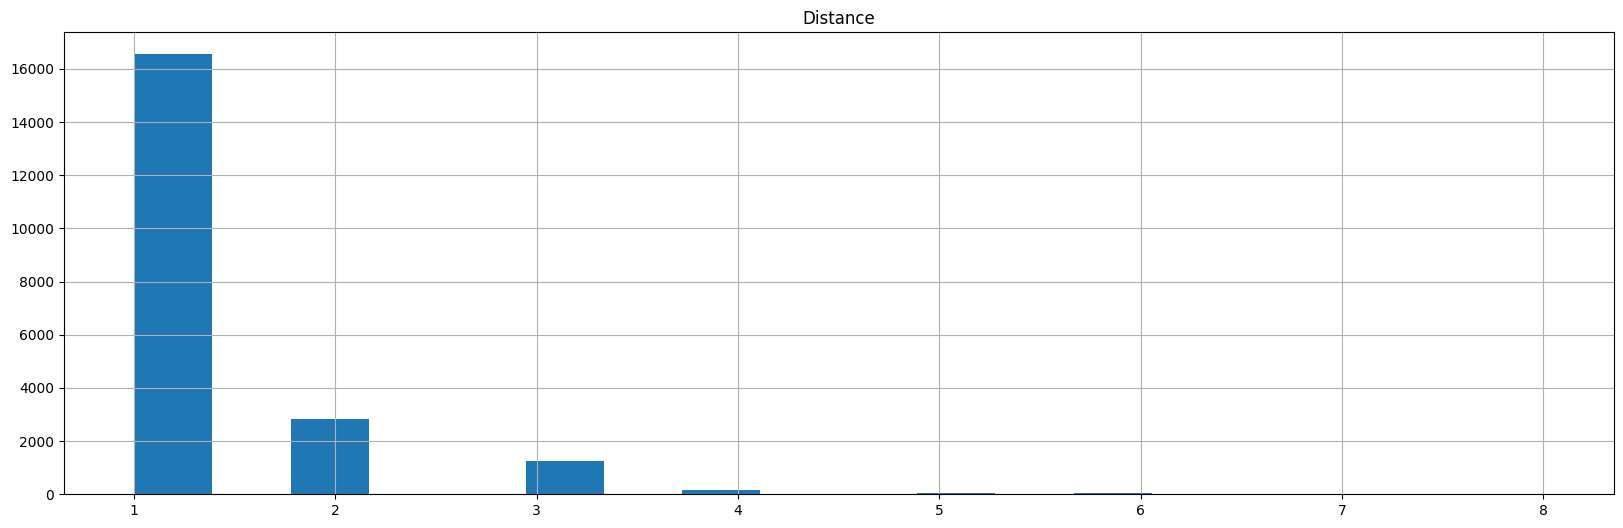

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

swaps.hist(column='Distance', bins=18, figsize=(20,6))


In [ ]:
len(swaps.index.get_level_values('pool').unique())

50

## Calculate Betweenness Centrality (NetworkX) (not used)

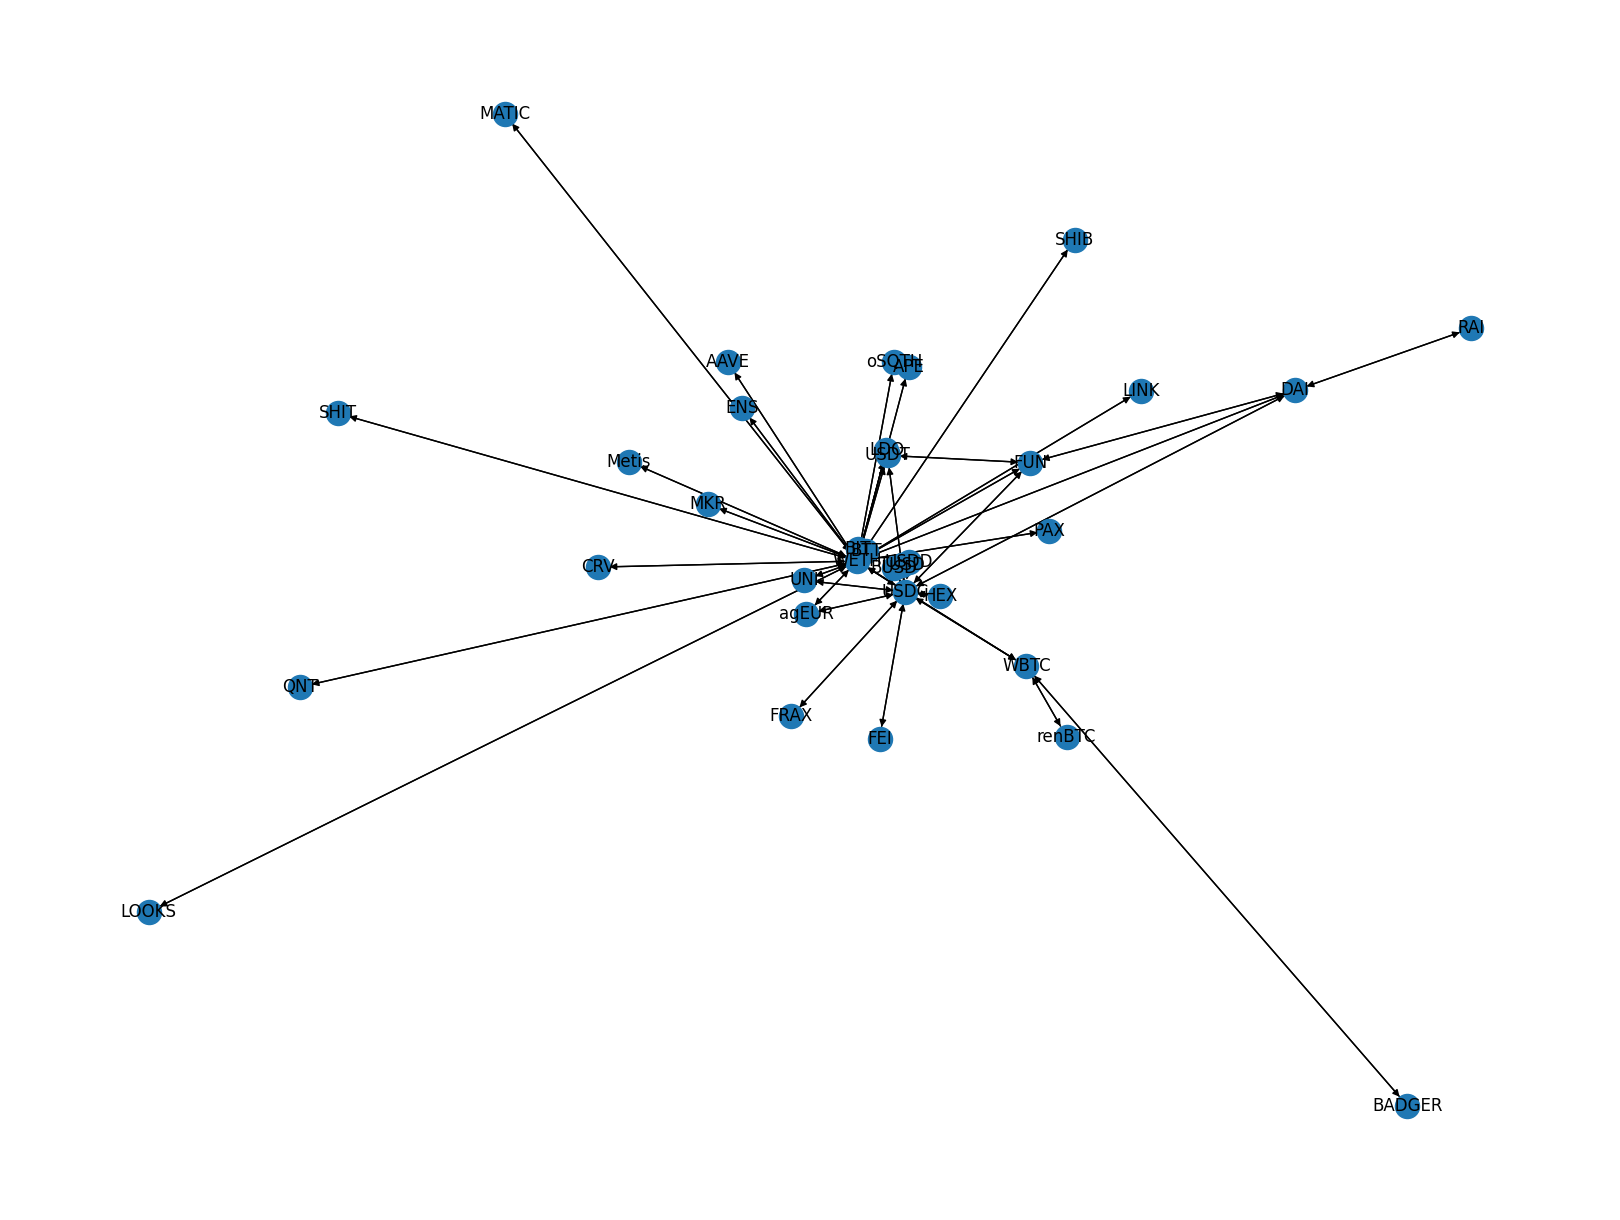

In [ ]:
import networkx as nx

G = nx.DiGraph()

for index, col in swaps.iterrows():
  source = col["Source"]
  target = col["Target"]
  dir_volume = col["amountUSD"]
  G.add_edge(source, target, weight=dir_volume)


# Plot the network
# pos = nx.circular_layout(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True)
plt.show()

In [ ]:
print("number of nodes: ", G.number_of_nodes())
print("number of edges: ", G.number_of_edges())


number of nodes:  34
number of edges:  81


In [ ]:
centrality = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
centrality

{'LDO': 0.0,
 'WETH': 0.783459595959596,
 'USDC': 0.33175505050505055,
 'WBTC': 0.11742424242424243,
 'QNT': 0.0,
 'USDT': 0.0,
 'agEUR': 0.0,
 'DAI': 0.05965909090909091,
 'LINK': 0.0,
 'oSQTH': 0.0,
 'PAX': 0.0,
 'UNI': 0.0,
 'HEX': 0.0,
 'LOOKS': 0.0,
 'FUN': 0.0012626262626262625,
 'FRAX': 0.0,
 'APE': 0.0,
 'MATIC': 0.0,
 'BIT': 0.0,
 'BUSD': 0.0,
 'MKR': 0.0,
 'SHIT': 0.0,
 'SHIB': 0.0,
 'BADGER': 0.0,
 'RAI': 0.0,
 'TUSD': 0.0,
 'ENS': 0.0,
 'Metis': 0.0,
 'BTT': 0.0,
 'FEI': 0.0,
 'CRV': 0.0,
 'AAVE': 0.0,
 'renBTC': 0.0,
 'USDD': 0.0}

In [ ]:
parent_tx = swaps.loc['0xc7142622463ca32a7efec6abed8ce21b2251946704d13e15b69eb2d6f1f522dd', :]
parent_tx

,id,timestamp,amount0,amount1,amountUSD,sender,recipient,origin,token0_id,token0_symbol,token1_id,token1_symbol,Source,Target,Distance
pool,,,,,,,,,,,,,,,
0xcb0c5d9d92f4f2f80cce7aa271a1e148c226e19d,0xc7142622463ca32a7efec6abed8ce21b2251946704d1...,1656634370,1000.000000,-3059.814781,3059.814781,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x389011d722e6aada5ee003d4f023943b9fdf54a0,0x03ab458634910aad20ef5f1c8ee96f1d6ac54919,RAI,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,RAI,DAI,3
0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0xc7142622463ca32a7efec6abed8ce21b2251946704d1...,1656634370,3059.577108,-2.896347,3059.507012,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x389011d722e6aada5ee003d4f023943b9fdf54a0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,USDC,WETH,3
0x5777d92f208679db4b9778590fa3cab3ac9e2168,0xc7142622463ca32a7efec6abed8ce21b2251946704d1...,1656634370,3059.814781,-3059.577108,3059.695944,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x389011d722e6aada5ee003d4f023943b9fdf54a0,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,DAI,USDC,3


In [ ]:
unsorted_sub_tx = []
for i in range(len(parent_tx)):
  unsorted_sub_tx.append([parent_tx.iloc[i]['Source'], parent_tx.iloc[i]['Target']])

unsorted_sub_tx

[['RAI', 'DAI'], ['USDC', 'WETH'], ['DAI', 'USDC']]

In [ ]:
sorted_sub_tx = [unsorted_sub_tx[0][0], unsorted_sub_tx[0][1]]
unsorted_sub_tx.remove(unsorted_sub_tx[0])


while len(unsorted_sub_tx) != 0:
    for pair in unsorted_sub_tx:
        if pair[-1] == sorted_sub_tx[0]:
            sorted_sub_tx.insert(0, pair[0])
            unsorted_sub_tx.remove(pair)
            break
        elif pair[0] == sorted_sub_tx[-1]:
            sorted_sub_tx.append(pair[-1])
            unsorted_sub_tx.remove(pair)
            break
        else:
            continue

print("sorted: ", sorted_sub_tx)
print("unsorted_sub_tx: ", unsorted_sub_tx)

sorted:  ['RAI', 'DAI', 'USDC', 'WETH']
unsorted_sub_tx:  []


## Statistical

In [ ]:
swaps_tx_route = pd.DataFrame(columns = ['id', 'route'])


In [ ]:
swaps_tx_route = pd.DataFrame(columns = ['id', 'route'])

for p_tx_index in swaps.index.get_level_values(0).unique():
    parent_tx = swaps.loc[p_tx_index, :]

    # Select the sub-transactions belong to one parent transaction
    unsorted_sub_tx = []
    for i in range(len(parent_tx)):
        unsorted_sub_tx.append([parent_tx.iloc[i]['Source'], parent_tx.iloc[i]['Target']])
        # Format as: [['B','C'], ['C','D'], ['A', 'B']]

    # Initialize the sorted list by the first element from unsorted list
    sorted_sub_tx = [unsorted_sub_tx[0][0], unsorted_sub_tx[0][1]]
    # Remove the element from unsorted list to sorted list
    unsorted_sub_tx.remove(unsorted_sub_tx[0])

    iter = 0

    # Do loop to sort, until no remaining unsorted element
    while len(unsorted_sub_tx) != 0:

        iter+=1

        if iter>20:
            swaps_tx_route.loc[len(swaps_tx_route.index)] = [p_tx_index, 'Error']
            print("Error: Incorrect format at transaction: ", p_tx_index)
            break

        # Iterate for each unsorted element to find **ONE** sub-transaction could act as previous one or following one of the current sorted list
        # Highlight: only find **ONE** tx in each loop
        for pair in unsorted_sub_tx:
            if pair[-1] == sorted_sub_tx[0]:
                # if find, remove the element from unsorted list to sorted list, and break the loop
                sorted_sub_tx.insert(0, pair[0])
                unsorted_sub_tx.remove(pair)
                break
            elif pair[0] == sorted_sub_tx[-1]:
                # if find, remove the element from unsorted list to sorted list, and break the loop
                sorted_sub_tx.append(pair[-1])
                unsorted_sub_tx.remove(pair)
                break

    # Theoritically, the algo complexity is (N-1)!, but in most cases it is N-1
    
    swaps_tx_route.loc[len(swaps_tx_route.index)] = [p_tx_index, sorted_sub_tx]

    # print("sorted: ", sorted_sub_tx)
    # print("unsorted_sub_tx: ", unsorted_sub_tx)

Error: Incorrect format at transaction:  0xaa01a0b92bad560125fae7e0e3dc576e301295cd254543798e77e94e06731b36
Error: Incorrect format at transaction:  0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201a202d02e8e1fdd139aa7
Error: Incorrect format at transaction:  0x4a01b12b0675db81a4ae303d7bb04e0773bdeb2c9c9345b705f9687ee3081336
Error: Incorrect format at transaction:  0xabc856fd92e6aa93dcc6bca5917618f31bedf5e316cfcd776a43cbbf878dcc3f
Error: Incorrect format at transaction:  0xbfa248f3e90b40c2f51e6660099e926b328164890bf52862315fcfb21b250bc0
Error: Incorrect format at transaction:  0x369a61d28858d8ea2127a6a2732f65f7446ebc02ccd2fc516c3fc761924f0c0f
Error: Incorrect format at transaction:  0xb084bf4fbe8c51df396f8f9371e2918948ebb357207df5aa0802e535221f6030
Error: Incorrect format at transaction:  0x441ef906470fbb6b2afe852575638a9fb50859343b52e9c11c2dad05a6fbe51f
Error: Incorrect format at transaction:  0xee675f4854e63a6b694945e01a703677b358f15884317e69311e59245cba21a2
Error: Incorrect format at t

In [ ]:
swaps_tx_route

,id,route
0,0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...,"[LDO, WETH]"
1,0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc2515...,"[USDC, WETH]"
2,0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0...,"[WETH, WBTC]"
3,0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab...,"[WETH, WBTC]"
4,0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1...,"[WETH, QNT]"
...,...,...
18605,0xe56b8b75624e0557412dea0434bfa3e150e39844207c...,"[WETH, USDC]"
18606,0x2fe885dc1c4ccaae75745b00b8101ed57b9dd1eba753...,"[WETH, APE]"
18607,0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...,"[FUN, WETH, DAI, FUN]"
18608,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,"[WETH, APE]"


In [ ]:
error = swaps_tx_route[swaps_tx_route['route'] == 'Error']
error

,id,route
371,0xaa01a0b92bad560125fae7e0e3dc576e301295cd2545...,Error
421,0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201...,Error
826,0x4a01b12b0675db81a4ae303d7bb04e0773bdeb2c9c93...,Error
871,0xabc856fd92e6aa93dcc6bca5917618f31bedf5e316cf...,Error
886,0xbfa248f3e90b40c2f51e6660099e926b328164890bf5...,Error
...,...,...
17493,0xdad96ef70d59a48944c5afc4c614401e496f45b1c671...,Error
17546,0x52473601454e2e7c52de7c7e9f539c7907d2cad5d86b...,Error
17893,0x0d4d79929cbb880b0cf7905a44fdbe53035855bd0939...,Error
17904,0x16fb7d55a7602f4ba7c4573867fc2105e7eff75adf1d...,Error


In [ ]:
error.iloc[4][0]

'0xbfa248f3e90b40c2f51e6660099e926b328164890bf52862315fcfb21b250bc0'

In [ ]:
swaps.loc[error.iloc[4][0], :]

,id,timestamp,amount0,amount1,amountUSD,sender,recipient,origin,token0_id,token0_symbol,token1_id,token1_symbol,Source,Target,Distance
pool,,,,,,,,,,,,,,,
0x11b815efb8f581194ae79006d24e0d814b7697f6,0xbfa248f3e90b40c2f51e6660099e926b328164890bf5...,1656635651,-26.635007,29266.452157,29266.445406,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xe0fee61dd3f51ea3a56637a35a3bde309a6a4034,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,USDT,WETH,3
0x3416cf6c708da44db2624d63ea0aaef7113527c6,0xbfa248f3e90b40c2f51e6660099e926b328164890bf5...,1656635651,29230.769230,-29266.452157,29248.610693,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xe0fee61dd3f51ea3a56637a35a3bde309a6a4034,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,USDC,USDT,3
0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0xbfa248f3e90b40c2f51e6660099e926b328164890bf5...,1656635651,160769.230770,-146.354523,160791.497325,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xe0fee61dd3f51ea3a56637a35a3bde309a6a4034,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,USDC,WETH,3


## Spoon TX

In [ ]:
swaps_tx_route

,id,route
0,0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...,"[LDO, WETH]"
1,0x2b5a3924f0ff0c2b165192ecd64e3740e07511bc2515...,"[USDC, WETH]"
2,0x2fbb0bfe5c077a1c163477f1c2715f5d4b9bdc5136e0...,"[WETH, WBTC]"
3,0x6b222a0bd335980387fb92a700e43d878c6fb0b61cab...,"[WETH, WBTC]"
4,0x7d42a41ae116f85a47306f4983a40939ebbad117a4a1...,"[WETH, QNT]"
...,...,...
18605,0xe56b8b75624e0557412dea0434bfa3e150e39844207c...,"[WETH, USDC]"
18606,0x2fe885dc1c4ccaae75745b00b8101ed57b9dd1eba753...,"[WETH, APE]"
18607,0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...,"[FUN, WETH, DAI, FUN]"
18608,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,"[WETH, APE]"


In [ ]:
swaps_tx_route.loc['test'] = ['test', ['A', 'B', 'C', 'A', 'X']]
swaps_tx_route.loc['test2'] = ['test2', ['X', 'Y', 'A', 'B', 'C', 'A']]
swaps_tx_route.loc['test3'] = ['test3', ['A', 'B', 'A', 'C', 'A']]

In [ ]:
test = ['a', 'b', 'a', 'c']
test_set = list(set(test))
print(test)
print(test_set)


['a', 'b', 'a', 'c']
['b', 'a', 'c']


In [ ]:

from collections import Counter
b = dict(Counter(test))
print(b)
test2=[key for key,value in b.items()if value > 1]

{'a': 2, 'b': 1, 'c': 1}


In [ ]:
loop = ['a','b','c','a','d']
loop[1:].index('a')
loop[1:]


['b', 'c', 'a', 'd']

In [ ]:
test2 = [[1,2], [2,3]]
str(test2)

'[[1, 2], [2, 3]]'

## Mark Label

In [ ]:
swaps_tx_route['label'] = 0
swaps_tx_route['new_list'] = 0

# Label the loop transactions (contain loop)
for index, tx in swaps_tx_route.iterrows():
    if len(tx['route'])-len(list(set(tx['route'])))!=0 and tx['route'] != 'Error':
        swaps_tx_route.loc[index, 'label'] = 'loop'

        # spoon format
        duplicate_counter = dict(Counter(tx['route']))
        duplicate_element = {key:value for key, value in duplicate_counter.items() if value > 1}

        new_list = []
        remaining = tx['route']

        for loop_node, element_count in duplicate_element.items():
            while element_count!=0:
                # if element_count==1:
                #     new_list.append(remaining)
                #     remaining = []
                
                # else:
                # remaining contrains the loop element, then split
                if loop_node in remaining[remaining.index(loop_node)+1:]:
                    loop_start_index = remaining.index(loop_node)
                    if loop_start_index > 0:
                        new_list.append(remaining[:loop_start_index])
                        remaining = remaining[loop_start_index:]

                    loop_end_index = remaining[1:].index(loop_node) + 1
                    new_list.append(remaining[:loop_end_index+1])
                    remaining = remaining[loop_end_index+1:]

                    if len(remaining)!=0:
                        new_list.append(remaining)
                
                # else:
                #     new_list.append(remaining)

                element_count-=2
                
        
        if len(new_list) > 1:
            swaps_tx_route.loc[index, 'label'] = 'spoon'

        swaps_tx_route.loc[index, 'new_list'] = str(new_list)
        
                


swaps_tx_route
        

KeyboardInterrupt: 

In [ ]:
swaps.loc['0x9c26c0e5db2a407abdd67d8e16d5653cd668531c2a0d264b781ed1494118b1c5']

,id,timestamp,amount0,amount1,amountUSD,sender,recipient,origin,token0_id,token0_symbol,token1_id,token1_symbol,Source,Target,Distance
pool,,,,,,,,,,,,,,,
0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5,0x9c26c0e5db2a407abdd67d8e16d5653cd668531c2a0d...,1656643965,366205.382569,-14380.090547,14380.090547,0xe592427a0aece92de3edee1f18e0157c05861564,0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a,0x234cc27499b8cde960324cbc55bb1905732e56a1,0x2b591e99afe9f32eaa6214f7b7629768c40eeb39,HEX,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,HEX,USDC,3
0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x9c26c0e5db2a407abdd67d8e16d5653cd668531c2a0d...,1656643965,14380.090547,-13.191763,14397.318236,0xe592427a0aece92de3edee1f18e0157c05861564,0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a,0x234cc27499b8cde960324cbc55bb1905732e56a1,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,USDC,WETH,3
0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0x9c26c0e5db2a407abdd67d8e16d5653cd668531c2a0d...,1656643965,-14265.896858,13.094500,14287.638140,0xe592427a0aece92de3edee1f18e0157c05861564,0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a,0x234cc27499b8cde960324cbc55bb1905732e56a1,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WETH,USDC,3


In [ ]:
swaps_tx_route[swaps_tx_route['label'] == 'spoon']

,id,route,label,new_list
756,0xd87cc8820bc684bba2398f55f9cb3b12fb3e8e740891...,"[WETH, USDC, DAI, WETH, USDT]",spoon,"[['WETH', 'USDC', 'DAI', 'WETH'], ['USDT']]"
3126,0x9c26c0e5db2a407abdd67d8e16d5653cd668531c2a0d...,"[HEX, USDC, WETH, USDC]",spoon,"[['HEX'], ['USDC', 'WETH', 'USDC']]"
6683,0x630d257c29640326b4ffa5e93b322e5dcfad906de475...,"[USDT, WETH, USDC, agEUR, WETH]",spoon,"[['USDT'], ['WETH', 'USDC', 'agEUR', 'WETH']]"
9565,0xbe27cf9c6414fe1bb87abde5281863120c9eb7f72038...,"[USDC, WETH, USDC, HEX]",spoon,"[['USDC', 'WETH', 'USDC'], ['HEX']]"
10765,0x56e685ffb1d7aef9d367638c1459e690f0757c46ff86...,"[WETH, USDC, USDT, WETH, USDC]",spoon,"[['WETH', 'USDC', 'USDT', 'WETH'], ['USDC']]"
18080,0xa6558a4b2895a154f1de6a614f55c94e141a42b9c147...,"[HEX, USDC, USDT, WETH, USDC]",spoon,"[['HEX'], ['USDC', 'USDT', 'WETH', 'USDC']]"
18083,0x40e215f7aa51b2e11dc89294e99fb11ef2760b901f88...,"[HEX, USDC, WETH, USDC]",spoon,"[['HEX'], ['USDC', 'WETH', 'USDC']]"
test,test,"[A, B, C, A, X]",spoon,"[['A', 'B', 'C', 'A'], ['X']]"
test2,test2,"[X, Y, A, B, C, A]",spoon,"[['X', 'Y'], ['A', 'B', 'C', 'A']]"


In [ ]:
swaps_tx_route.loc[18083]['id']

'0x40e215f7aa51b2e11dc89294e99fb11ef2760b901f886997402dcd4d82233c37'

In [ ]:
swaps_tx_route[swaps_tx_route['label'] == 'loop']

,id,route,label,new_list
78,0xd133ff2c87c082893357c3a3cce0cc66dc00eb4cd08d...,"[WETH, FUN, USDT, WETH]",loop,"[['WETH', 'FUN', 'USDT', 'WETH']]"
93,0xf269cc9ffe90aecdc349e5905abaf4d39eb7f07efd6a...,"[WETH, agEUR, USDC, WETH]",loop,"[['WETH', 'agEUR', 'USDC', 'WETH']]"
121,0x6eb5b359387bae06b7a8f36b5abf56dfb586080b9f12...,"[WETH, FUN, USDT, WETH]",loop,"[['WETH', 'FUN', 'USDT', 'WETH']]"
159,0x3ead09b639d827ac1a960cc547e19793ba33ff068ab2...,"[WETH, agEUR, USDC, WETH]",loop,"[['WETH', 'agEUR', 'USDC', 'WETH']]"
181,0xc299019730e30178d3e73d77dce532f04120c23906f0...,"[DAI, USDC, WETH, DAI]",loop,"[['DAI', 'USDC', 'WETH', 'DAI']]"
...,...,...,...,...
18493,0x4f8704714083c9e5cd8f8f3d73192ec7fae314a8aecc...,"[WETH, FUN, USDT, WETH]",loop,"[['WETH', 'FUN', 'USDT', 'WETH']]"
18505,0x022efa2cfecb49a97f96b5173dc12e4ebce718cee656...,"[WETH, FUN, USDC, USDT, WETH]",loop,"[['WETH', 'FUN', 'USDC', 'USDT', 'WETH']]"
18514,0x2dfa0aea1268c713f9e78ea54e80fc94b8de16ae6251...,"[WETH, agEUR, USDC, WETH]",loop,"[['WETH', 'agEUR', 'USDC', 'WETH']]"
18525,0x38778595d646fdf40e58890545afce901aa5d7a35dc6...,"[WETH, FUN, DAI, WETH]",loop,"[['WETH', 'FUN', 'DAI', 'WETH']]"


In [ ]:
swaps_tx_route[swaps_tx_route['label'] == 'spoon']['id'][3126]

'0x9c26c0e5db2a407abdd67d8e16d5653cd668531c2a0d264b781ed1494118b1c5'

In [ ]:
swaps_tx_route.iloc[3126]

id          0x9c26c0e5db2a407abdd67d8e16d5653cd668531c2a0d...
route                                 [HEX, USDC, WETH, USDC]
label                                                   spoon
new_list                  [['HEX'], ['USDC', 'WETH', 'USDC']]
Name: 3126, dtype: object

In [ ]:
swaps_tx_route['label'].value_counts()

0        18273
loop       330
spoon        9
Name: label, dtype: int64

In [ ]:
# Count loop trading (contains loop)




In [ ]:
# All pass, DELETE

# verify the number of duplicates of inner loop
counter = 0
for index, tx in swaps_tx_route.iterrows():
    if len(tx['route'])-len(list(set(tx['route'])))==1 and tx['route'] != 'Error':
        print("Error: number of duplicates is: ", len(tx['route'])-len(list(set(tx['route']))), "at tx: ", index, '  id:', tx['id'])
        counter+=1

print('--------------')
print(counter)

Error: number of duplicates is:  1 at tx:  78   id: 0xd133ff2c87c082893357c3a3cce0cc66dc00eb4cd08d9041ba355a2922fbe1b1
Error: number of duplicates is:  1 at tx:  93   id: 0xf269cc9ffe90aecdc349e5905abaf4d39eb7f07efd6a2197513c0b6ccfcd0c62
Error: number of duplicates is:  1 at tx:  121   id: 0x6eb5b359387bae06b7a8f36b5abf56dfb586080b9f1224482a78a7d05252817a
Error: number of duplicates is:  1 at tx:  159   id: 0x3ead09b639d827ac1a960cc547e19793ba33ff068ab251328e92068e1bc414a4
Error: number of duplicates is:  1 at tx:  181   id: 0xc299019730e30178d3e73d77dce532f04120c23906f00d3c0c42474ff8973512
Error: number of duplicates is:  1 at tx:  217   id: 0x51d18eb399a4850c25cb72d0ff6e9f673136eaed4b89f3dd6d9161dc369d5e82
Error: number of duplicates is:  1 at tx:  314   id: 0x77f8c70d0f86974ccb57ba4edc0084117ad66ddfe65a340245d4ad84f1bf560e
Error: number of duplicates is:  1 at tx:  367   id: 0xb4e6390246f38c32abcde540fda5344594770ff34b802aa32462f49e2c567fea
Error: number of duplicates is:  1 at tx: 

In [ ]:
swaps_tx_route[swaps_tx_route['route'] == 'Error']

,id,route,label,new_list
371,0xaa01a0b92bad560125fae7e0e3dc576e301295cd2545...,Error,0,0
421,0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201...,Error,0,0
826,0x4a01b12b0675db81a4ae303d7bb04e0773bdeb2c9c93...,Error,0,0
871,0xabc856fd92e6aa93dcc6bca5917618f31bedf5e316cf...,Error,0,0
886,0xbfa248f3e90b40c2f51e6660099e926b328164890bf5...,Error,0,0
...,...,...,...,...
17493,0xdad96ef70d59a48944c5afc4c614401e496f45b1c671...,Error,0,0
17546,0x52473601454e2e7c52de7c7e9f539c7907d2cad5d86b...,Error,0,0
17893,0x0d4d79929cbb880b0cf7905a44fdbe53035855bd0939...,Error,0,0
17904,0x16fb7d55a7602f4ba7c4573867fc2105e7eff75adf1d...,Error,0,0


In [ ]:
pick_id = swaps_tx_route.iloc[421]['id']
print(pick_id)
swaps.loc[pick_id]

0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201a202d02e8e1fdd139aa7


,id,timestamp,amount0,amount1,amountUSD,sender,recipient,origin,token0_id,token0_symbol,token1_id,token1_symbol,Source,Target,Distance
pool,,,,,,,,,,,,,,,
0x4585fe77225b41b697c938b018e2ac67ac5a20c0,0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201...,1656634696,0.124797,-2.329275,2455.594067,0x6af1a16fde7346e7729fa921ad2ddf6a462061e2,0x6af1a16fde7346e7729fa921ad2ddf6a462061e2,0x4dd36c49b200a6d52ebb365f01bf0e4db8b9f765,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WBTC,WETH,2
0xe15e6583425700993bd08f51bf6e7b73cd5da91b,0xa24d942e1d22d9d487e7e2c2305aad291ed3d0194201...,1656634696,0.123463,-788.277635,2427.592516,0x6af1a16fde7346e7729fa921ad2ddf6a462061e2,0xcd7989894bc033581532d2cd88da5db0a4b12859,0x4dd36c49b200a6d52ebb365f01bf0e4db8b9f765,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0x3472a5a71965499acd81997a54bba8d852c6e53d,BADGER,WBTC,BADGER,2
